# Ford GoBike Trips Data Investigations

# Project Description

Data set under exploration include a part of information about a bike-sharing system that covering the greater San Francisco Bay area for a period of one month starting from the 1st of February 2019.The dataset covers data such as

• Trip Duration (seconds)

• Start Time and Date

• End Time and Date

• Start Station ID, Name, Latitude, and Longitude

• End Station ID, Name, Latitude, and Longitude

• Bike ID

• User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

• Member Year of Birth

• Member Gender.

• Bike Share for all Trip (Bike Share program for low-income residents)

This project intends to study statistics distributions of the number of trips (count) along the period under investigations in this project. Another target in this investigation is to elucidate and detect variable(s) that may affect the trip duration of the users. Factors such as the age of the user, gender and/or user type are expected to be the most influential variables that may control the number and duration of the trips.

The outline of this report is as follows. In the next section,  we have performed a data wrangling to identify the data required for the analysis from that will trim. After that, the cleaned data is explored by computing statistics and creating supportive charts and graphs. In the end, a brief summarization of the findings will be afforded.

<a id='wrangling'></a>
## Data Wrangling
In this part, we are uploading the data set under investigation to determine which attributes are useful for our analysis and which must be trimmed. We start by studying the general properties of the dataset by checking for duplicated values and Null ones. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

In [2]:
#load data
ford = pd.read_csv('201902-fordgobike-tripdata.csv')
ford.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


## Assessing Data

In [3]:
print(ford.shape)

(183412, 16)


In [4]:
# data information
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Checking for Null Values

In [5]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### From the above analysis, we have detected some missing data in the columns such as start_station_id , start_station_name ,end_station_id , end_station_name, member_birth_year, member_gender.

#### Checking for duplicated values

In [6]:
sum(ford.duplicated())

0

 The above data confirm that the dataset does not have duplicated.

#### Checking for unique values

In [7]:
ford.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

# Data Cleaning

Looking at the dataset under investigation, we have recognised that attributes such as start station and end station ID, latitude and longitude would not be valuable to our explorations. So, we are going to clean them. Further,  to make it easy to handle some of the data, we have converted the start_time and end_time columns data type into a Datetime data format. Then, we have extracted essential data by isolating the minutes, the hour, and the day of the week from start_time  and end_time for visualising bike usage over time. Accordingly, six more columns have been inserted with titles Start_day, Start_hour, Start_minute, End_day, End_hour and End_minute.  In addition, member age has been derived from member_birth_year data, and a new column with the title Age has inserted. Moreover, duration_sec has been converted into duration_min or visualisations purpose. Finally, we have removed all unnecessary columns and Null data, and then the data set is ready for exploration.

### Delete unwanted columns

In [8]:
ford.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
           'end_station_longitude'],axis=1,inplace=True)

### convert data type of start_time , end_time to datetime data type

In [9]:
ford['start_time']=pd.to_datetime(ford['start_time'])
ford['end_time']=pd.to_datetime(ford['end_time'])

### Here, we checked for the start month and end month, and we ended with that all the data come over only one month.

In [10]:
# Insert two new columns for Start month and End month
ford['Start_month'] = pd.to_datetime(ford['start_time']).dt.month
ford['End_month'] = pd.to_datetime(ford['end_time']).dt.month


In [11]:
# Check for start month value counts
ford['Start_month'].value_counts()

2    183412
Name: Start_month, dtype: int64

In [12]:
# Check for end month value counts
ford['End_month'].value_counts()

2    183396
3        16
Name: End_month, dtype: int64

#### It seems that all trips started, and most of them ended in February, so we can delete these 16 trips that ended in March.

#### Deleting March data

In [13]:
ford.drop(ford[ford['End_month'] == 3 ].index, inplace = True)

In [14]:
ford['End_month'].value_counts()

2    183396
Name: End_month, dtype: int64

In [15]:
ford['Age']= 2019 - ford['member_birth_year']

####  Inserting new columns 


In [16]:
ford['Start_day'] = pd.to_datetime(ford['start_time']).dt.day
ford['Start_hour'] = pd.to_datetime(ford['start_time']).dt.hour
ford['Start_minute'] = pd.to_datetime(ford['start_time']).dt.minute

ford['End_day'] = pd.to_datetime(ford['end_time']).dt.day
ford['End_hour'] = pd.to_datetime(ford['end_time']).dt.hour
ford['End_minute'] =pd.to_datetime(ford['end_time']).dt.minute

#### setting duration by minutes instead of seconds

In [17]:
ford['Duration_min']=(ford['duration_sec']/60).astype(int)

#### Delete columns start_time , end_time , Start_month, End_month and duration_sec

In [18]:
ford.drop(['start_time','end_time','Start_month','End_month','duration_sec','member_birth_year'],axis=1,inplace=True)
ford.head(1)

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,Start_day,Start_hour,Start_minute,End_day,End_hour,End_minute,Duration_min
16,22nd St at Dolores St,Broderick St at Oak St,6572,Subscriber,Male,No,38.0,28,23,50,28,23,59,9


#### The column member_gender has missing values

In [19]:
ford = ford.dropna()

##### Checking for any more null values

In [20]:
ford.isnull().sum()

start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
Age                        0
Start_day                  0
Start_hour                 0
Start_minute               0
End_day                    0
End_hour                   0
End_minute                 0
Duration_min               0
dtype: int64

In [21]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174938 entries, 16 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_name       174938 non-null  object 
 1   end_station_name         174938 non-null  object 
 2   bike_id                  174938 non-null  int64  
 3   user_type                174938 non-null  object 
 4   member_gender            174938 non-null  object 
 5   bike_share_for_all_trip  174938 non-null  object 
 6   Age                      174938 non-null  float64
 7   Start_day                174938 non-null  int64  
 8   Start_hour               174938 non-null  int64  
 9   Start_minute             174938 non-null  int64  
 10  End_day                  174938 non-null  int64  
 11  End_hour                 174938 non-null  int64  
 12  End_minute               174938 non-null  int64  
 13  Duration_min             174938 non-null  int32  
dtypes: 

In [22]:
ford.describe()

,bike_id,Age,Start_day,Start_hour,Start_minute,End_day,End_hour,End_minute,Duration_min
count,174938.000000,174938.000000,174938.000000,174938.000000,174938.000000,174938.000000,174938.000000,174938.000000,174938.000000
mean,4482.498405,34.196881,15.311322,13.455533,29.450228,15.312859,13.610525,29.665910,11.226966
std,1659.216525,10.118756,8.033445,4.733850,17.377694,8.033429,4.746873,17.441241,27.148935
min,11.000000,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3799.000000,27.000000,8.000000,9.000000,14.000000,8.000000,9.000000,15.000000,5.000000
50%,4960.000000,32.000000,15.000000,14.000000,29.000000,15.000000,14.000000,30.000000,8.000000
75%,5505.000000,39.000000,22.000000,17.000000,45.000000,22.000000,18.000000,45.000000,13.000000
max,6645.000000,141.000000,28.000000,23.000000,59.000000,28.000000,23.000000,59.000000,1409.000000


##### Our cleaned data frame contains 14 descriptors for over 174938 fordgobike trips. Of the 14 factors, nine are numerical(int or float), and five are object type. Note that the data provided is only for one month (March 2019) in the greater San Francisco Bay area. 

# Data Exploration

In this part, we address the main questions that needed to be examined. Here are some questions under invistigations:

1. When are most trips taken in terms of the time of day or day of the month?

2. How long does the average trip take?

3. Does User Type (Subscriber or Customer) affect the duration?

4. Do Age and gender of the user affect the duration?

5. Which time of the day/ month affects the duration?

We have utilised different types of characterisations and visualisations tools in our analysis. 


### We have started with some numerical investigations which answered some of the addressed questions.

In [23]:
ford['user_type'].value_counts()

Subscriber    158375
Customer       16563
Name: user_type, dtype: int64

#### We can observe that almost 90% of the bike riders are subscribers with a monthly or yearly membership, whilst ~10% are customers.  

In [24]:
ford['member_gender'].value_counts()

Male      130490
Female     40803
Other       3645
Name: member_gender, dtype: int64

#### Here we can find that the majority of the users are male, with a remarkable number of female and a small number come under the category others.

### Start and end stations counts

In [25]:
ford['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2710
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Palm St at Willow St                                            2
Name: start_station_name, Length: 329, dtype: int64

In [26]:
ford['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

We have 329 for both Start and End stations, and the most common pickup stations are: 
1. Market St at 10th St
2. San Francisco Caltrain Station 2 (Townsend St at 4th St)
3. Berry St at 4th St
4. Montgomery St BART Station (Market St at 2nd St)
5. Powell St BART Station (Market St at 4th St)
and the first five End stations are:
1. San Francisco Caltrain Station 2 (Townsend St at 4th St)
2. Market St at 10th St
3. Montgomery St BART Station (Market St at 2nd St)
4. San Francisco Ferry Building (Harry Bridges Plaza)
5. San Francisco Caltrain (Townsend St at 4th St)
             

### Bike Share Program members

In [27]:
ford['bike_share_for_all_trip'].value_counts()

No     157595
Yes     17343
Name: bike_share_for_all_trip, dtype: int64

 The member of the Bike Shar program is around 11% of the total user.

# Explanatory Analysis :

## Univariate Exploration:

In this section, we use the univariate explorations to study the visualisations of all features in the data set separately. We shall utilise different visualisations tools such as histogram, count plot, and pie chart depending on the variables formate. 
We start by study the duration in minutes as the most interesting variable.

### Exploring duration in minutes

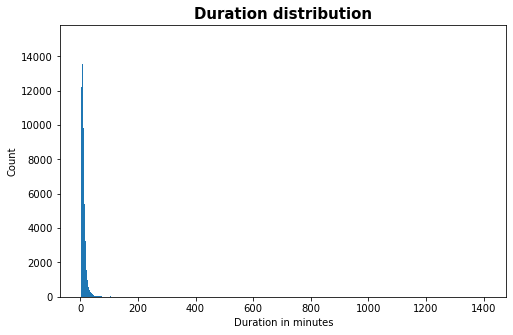

In [29]:
bins = np.arange(0, ford['Duration_min'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'Duration_min',bins=bins)
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.title('Duration distribution',fontweight="bold",fontsize = 15);
plt.show();

#### The distribution is heavily skewed to the right with a long-tailed distribution to the left. In order to obtain a good visualisation, we have to put a limit of 22 on x-axis.

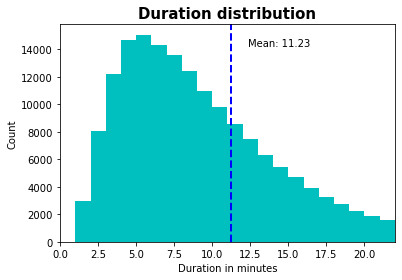

In [30]:
x = ford['Duration_min'].values
result = plt.hist(x, bins=bins, color='c')
plt.xlim((0,22));
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.title('Duration distribution',fontweight="bold",fontsize = 15);
plt.show();

#### From the above distribution, we can conclude that most of the trips are taken a low time durations, and very few are taken long durations. The mean value of all duration is about 11.23 minutes, which reinforces the idea that the bikes are often used for short trips. Indeed, 75% of the rides are below 13 minutes, and 50% are below 8 minutes, with  longest trip is 1409 minutes and the shortest being one minute.  

### Next, we will study the trips distributions over the month days and the day hours.

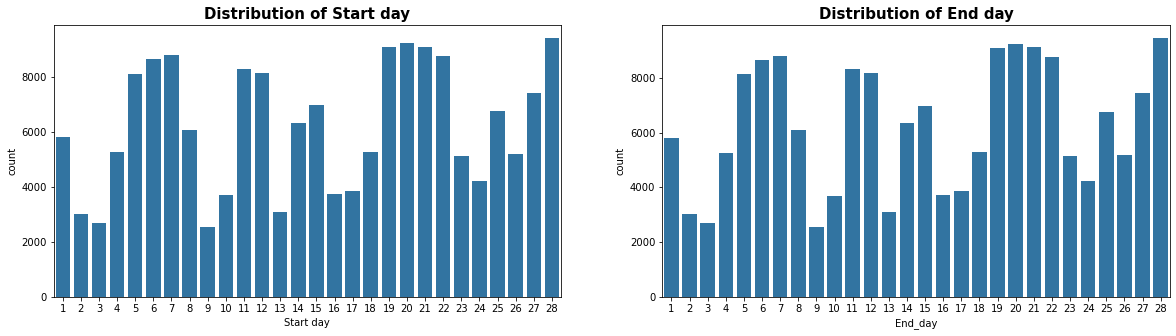

In [31]:
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
base_color=sb.color_palette()[0]
sb.countplot(data=ford , x='Start_day',color=base_color);
plt.xlabel('Start day')
plt.title('Distribution of Start day',fontweight="bold",fontsize = 15);


plt.subplot(1, 2, 2)
base_color=sb.color_palette()[0]
sb.countplot(data=ford , x='End_day',color=base_color);
plt.title('Distribution of End day',fontweight="bold",fontsize = 15);


#### Ordering from high to low

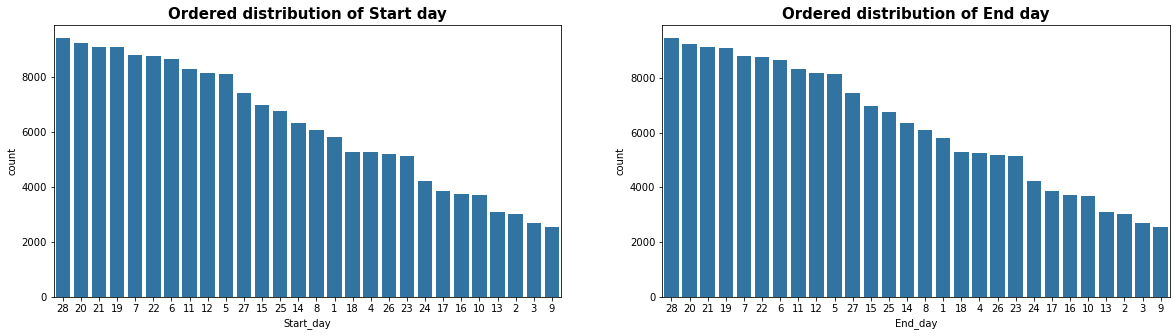

In [32]:
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1)
base_color=sb.color_palette()[0]

plt.title('Ordered distribution of Start day',fontweight="bold",fontsize = 15);
freq1= ford['Start_day'].value_counts()
d1_order = freq1.index
sb.countplot(data=ford , x='Start_day',color=base_color, order=d1_order);

plt.subplot(1, 2, 2)
base_color=sb.color_palette()[0]
plt.title('Ordered distribution of End day',fontweight="bold",fontsize = 15);
freq2= ford['End_day'].value_counts()
d2_order = freq2.index
sb.countplot(data=ford , x='End_day',color=base_color, order=d2_order);

#### In the above figures, we can observe many peaks along the month that repeated in an almost constant interval. By checking of 2019 calendar, we can easily recognise that users ride more on workdays, whilst during the weekends, the number of trips falls down. Any irregularity in the results can be attributed to the existence of holidays or disturbances in the weather on such days.  

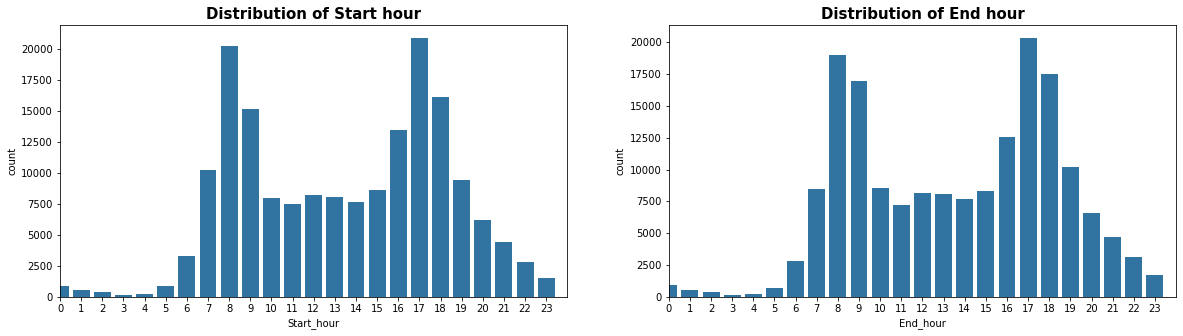

In [33]:

plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
base_color=sb.color_palette()[0]
sb.countplot(data=ford , x='Start_hour',color=base_color);
plt.title('Distribution of Start hour',fontweight="bold",fontsize = 15);

plt.xlim((0,24))


plt.subplot(1, 2, 2)
base_color=sb.color_palette()[0]
sb.countplot(data=ford , x='End_hour',color=base_color)
plt.title('Distribution of End hour',fontweight="bold",fontsize = 15);
plt.xlim((0,24));


#### The above chart shows two prominent peaks at 8 AM and 5 PM, confirming that the bike share system is busiest during rush hours. In the same manner, it should not be a surprise that the quietest times are after midnight. 

###  Exploring Age

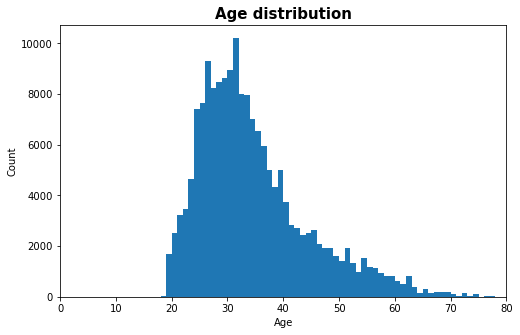

In [34]:
bins = np.arange(0, ford['Age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'Age',bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution',fontweight="bold",fontsize = 15);
plt.xlim(0,80)
plt.show();

#### First, we noticed that the user's age is restricted to those 18 years or older in this data set. However, the distribution indicates that 50% of users ages range from 27 to 39 years old, with a mean age of about 34.19.   

### User type pie chart

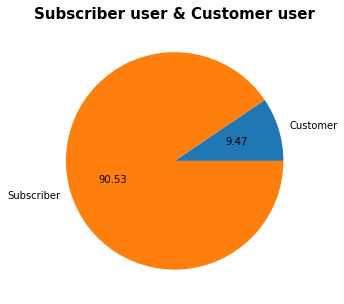

In [35]:
plt.title('Subscriber user & Customer user',fontweight="bold",fontsize = 15)
ford.groupby('user_type').size().plot(kind='pie', autopct='%.2f',figsize=[5,5])
plt.ylabel('');

####  The pie chart of the use type shows that users are subscribers (90.53 % of total users) who use the service. On the other hand,  the actual customers representing only 9.47 % of the total users.

### Member Gender pie chart

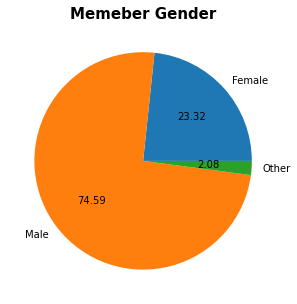

In [36]:
plt.title('Memeber Gender',fontweight="bold",fontsize = 15)
ford.groupby('member_gender').size().plot(kind='pie', autopct='%.2f',figsize=[5,5])
plt.ylabel('');

#### Males represent most users who use the go bike service, and after those, females and other genders come with percentages of 23,32% and 2.08%, respectively.

### Bike Shar for All Trip pie chart

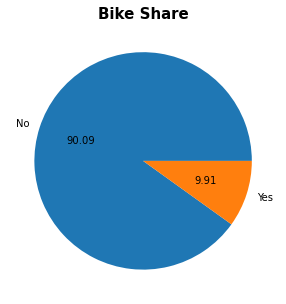

In [37]:
plt.title('Bike Share',fontweight="bold",fontsize = 15)
ford.groupby('bike_share_for_all_trip').size().plot(kind='pie', autopct='%.2f',figsize=[5,5])
plt.ylabel('');

#### The bike shar program member represents a round 10% of the total user.

## Bivariate Exploration :

Bivariate analysis is essential in exploring the relationship between two variables. We use scattered plots and heatmaps to explore the relationship between two quantitative variables. In contrast, to investigate the relationship between quantitative and qualitative variables, a violin plot is used. 

### Start day and end day scatter plot

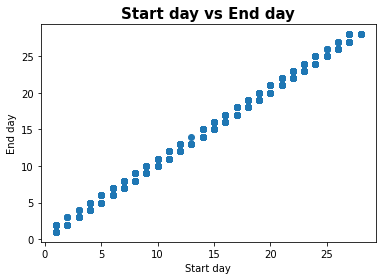

In [38]:
plt.scatter(data = ford, x = 'Start_day',y = 'End_day');
plt.xlabel('Start day')
plt.ylabel('End day')
plt.title('Start day vs End day',fontweight="bold",fontsize = 15);
plt.show();

#### The scatter plot shows that almost all trips are started and ended on the same day.

### Start hour and Start day- Duration heatmap

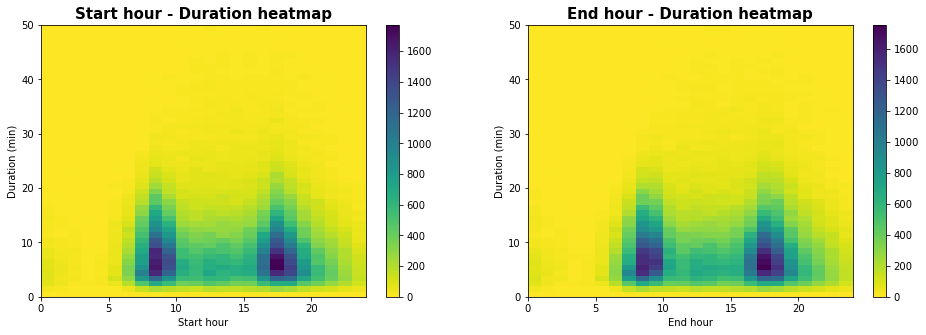

In [39]:
plt.figure(figsize = [16, 5])
plt.subplot(1,2,1)
bins_x = np.arange(0, 24+1, 1)
bins_y = np.arange(0, 50+1,1)
plt.hist2d(data = ford, x = 'Start_hour', y = 'Duration_min', cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Start hour - Duration heatmap',fontweight="bold",fontsize = 15);
plt.xlabel('Start hour')
plt.ylabel('Duration (min)');

plt.subplot(1,2,2)
bins_x = np.arange(0, 24+1, 1)
bins_y = np.arange(0, 50+1,1)
plt.hist2d(data = ford, x = 'End_hour', y = 'Duration_min', cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('End hour - Duration heatmap',fontweight="bold",fontsize = 15);
plt.xlabel('End hour')
plt.ylabel('Duration (min)');


#### TThe above map can not detect any variation of the duration time of the trips against the start hour till the first 50 minutes trip durations. The darker colour in the heatmap represents the highest number of trips. It is obvious that most trips occur in the rush hour of the day (8 Am and 5 P) with a duration of fewer than ten minutes. 

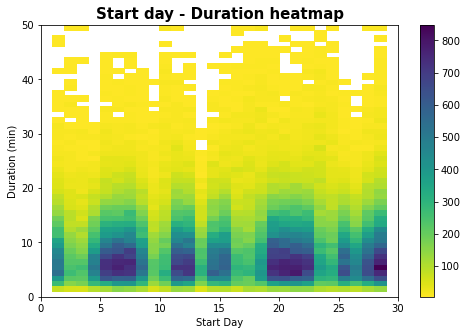

In [40]:
plt.figure(figsize = [8, 5])

bins_x = np.arange(0, 30+1, 1)
bins_y = np.arange(0, 50+1,1)
plt.hist2d(data = ford, x = 'Start_day', y = 'Duration_min',cmin=5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Start Day')
plt.ylabel('Duration (min)')
plt.title('Start day - Duration heatmap',fontweight="bold",fontsize = 15);


#### In the Start day-Duration heatmap, the distribution of the duration time over all the days is smooth till a trip duration of 27 minutes. 

### Violin Plots

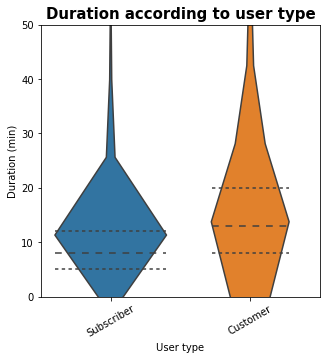

In [41]:
plt.figure(figsize = [5,5])
sb.violinplot(data=ford, x='user_type', y='Duration_min', inner='quartile')
plt.xticks(rotation=30);
plt.ylim(0,50)
plt.xlabel('User type')
plt.ylabel('Duration (min)')
plt.title('Duration according to user type',fontweight="bold",fontsize = 15);

#### Despite the small percentage of the customer (9.47 %), they spend more time on their trips than the subscriber. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but the customer users might be tourists that use the bikes for travelling around town.

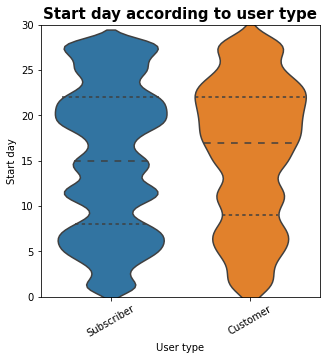

In [42]:
plt.figure(figsize = [5,5])
sb.violinplot(data=ford, x='user_type', y='Start_day' , inner='quartile')
plt.xticks(rotation=30);
plt.ylim(0,30)
plt.xlabel('User type')
plt.ylabel('Start day')
plt.title('Start day according to user type',fontweight="bold",fontsize = 15);


#### The subscribers appear to use the bike on weekdays, however, the customer's usage concentrates more on the next half of the month.

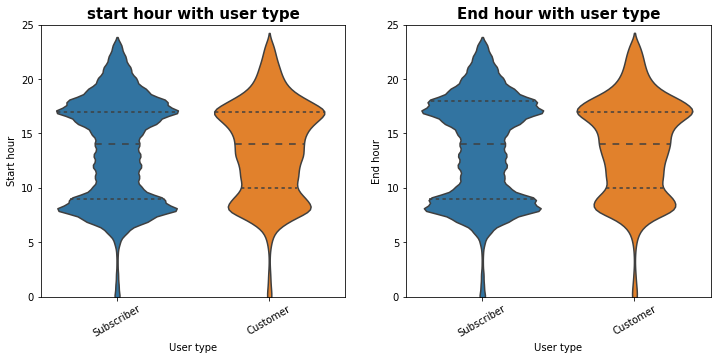

In [43]:
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sb.violinplot(data=ford, x='user_type', y='Start_hour' , inner='quartile')
plt.xticks(rotation=30);
plt.ylim(0,25)
plt.xlabel('User type')
plt.ylabel('Start hour')
plt.title('start hour with user type',fontweight="bold",fontsize = 15);
plt.subplot(1,2,2)
sb.violinplot(data=ford, x='user_type', y='End_hour', inner='quartile')
plt.xticks(rotation=30);
plt.ylim(0,25)
plt.xlabel('User type')
plt.ylabel('End hour')
plt.title('End hour with user type',fontweight="bold",fontsize = 15);

#### It is obvious that the subscribers use the service during rush hours, while the customers tend to use the service more afternoon.

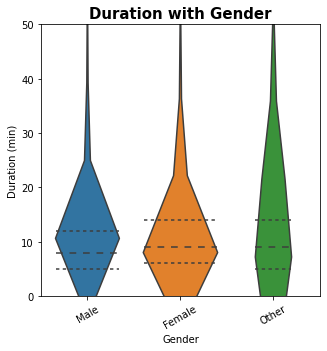

In [44]:
plt.figure(figsize = [5,5])
sb.violinplot(data=ford, x='member_gender', y='Duration_min' , inner='quartile')
plt.xticks(rotation=30);
plt.ylim(0,50);
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration with Gender',fontweight="bold",fontsize = 15);

#### The most important result here is that a remarkable percentage of the other genders users spend more time on their trips than males and females

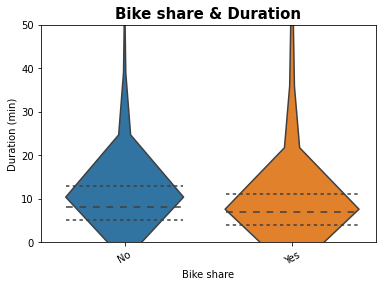

In [45]:
sb.violinplot(data=ford, x='bike_share_for_all_trip', y='Duration_min' , inner='quartile')
plt.ylim(0,50);
plt.xticks(rotation=30);
plt.xlabel('Bike share')
plt.ylabel('Duration (min)')
plt.title('Bike share & Duration',fontweight="bold",fontsize = 15);

#### The majority of the Bike Share program members spend less time on their trips than regular users.

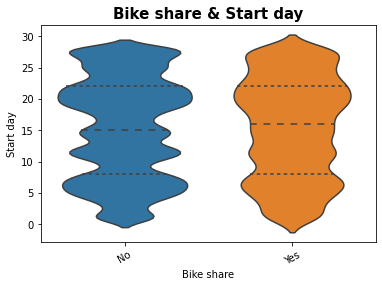

In [46]:
sb.violinplot(data=ford, x='bike_share_for_all_trip', y='Start_day' , inner='quartile');
plt.xticks(rotation=30);
plt.xlabel('Bike share')
plt.ylabel('Start day')
plt.title('Bike share & Start day',fontweight="bold",fontsize = 15);

#### There is no remarkable change in the distribution of the bike Share members along the month days, which may be because this program is directed to low-income residents. And so most of them may not have a fixed job.

## Multivariate Exploration:

Multivariate analysis is performed to understand interactions between different factors in the dataset (or) finding interactions between more than two variables.

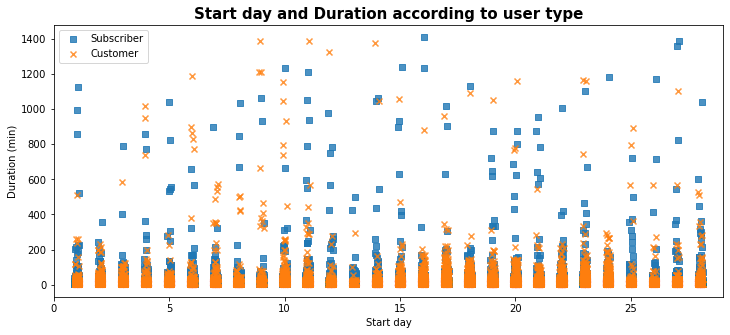

In [47]:
plt.figure(figsize = [12,5])
start_markers = [['Subscriber', 's'],['Customer', 'x']]
for start,marker in start_markers:
    ford_start = ford.loc[ford['user_type'] == start]
    sb.regplot(data=ford_start , x='Start_day',y='Duration_min',x_jitter=0.1,fit_reg=False,marker=marker);
    plt.xlim(0,29)
plt.legend(['Subscriber','Customer']);
plt.xlabel('Start day')
plt.ylabel('Duration (min)')
plt.title('Start day and Duration according to user type',fontweight="bold",fontsize = 15);
plt.show();

#### The plot represents the relationship between the start day and duration for the type of users. To make it more obvious, we split the figure for both types; subscriber and customer

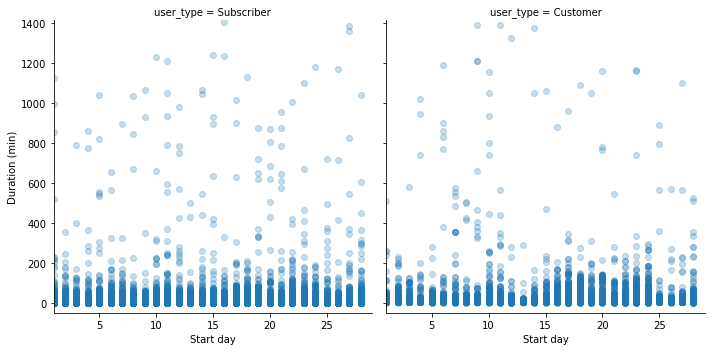

In [48]:
genders = sb.FacetGrid(data = ford, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [1, 29], ylim = [-50, 1415])
genders.map(plt.scatter, 'Start_day', 'Duration_min', alpha=0.25)
genders.set_xlabels('Start day')
genders.set_ylabels('Duration (min)')
plt.show();

#### The remarkable observation here is that both Subscriber and Customer have almost the same chaotic concentrations for trips durations higher than 200 minutes. Further, both of them have ride durations near the maximum durations. 

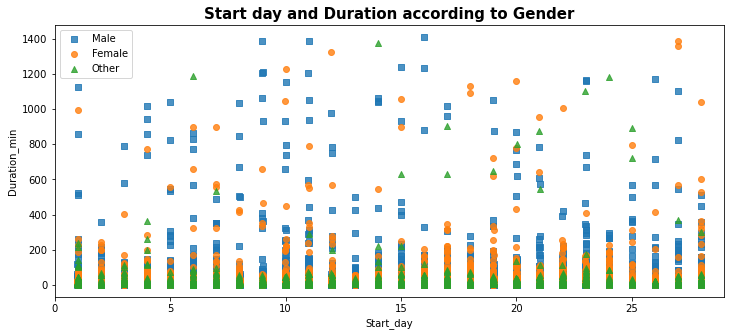

In [49]:
plt.figure(figsize = [12,5])
gender_markers = [['Male', 's'],['Female', 'o'],['Other','^']]
for gender,marker in gender_markers:
    ford_gender = ford.loc[ford['member_gender'] == gender]
    sb.regplot(data=ford_gender , x='Start_day',y='Duration_min',x_jitter=0.01,fit_reg=False,marker=marker);
    plt.xlim(0,29)
plt.legend(['Male','Female','Other']);
plt.title('Start day and Duration according to Gender',fontweight="bold",fontsize = 15);


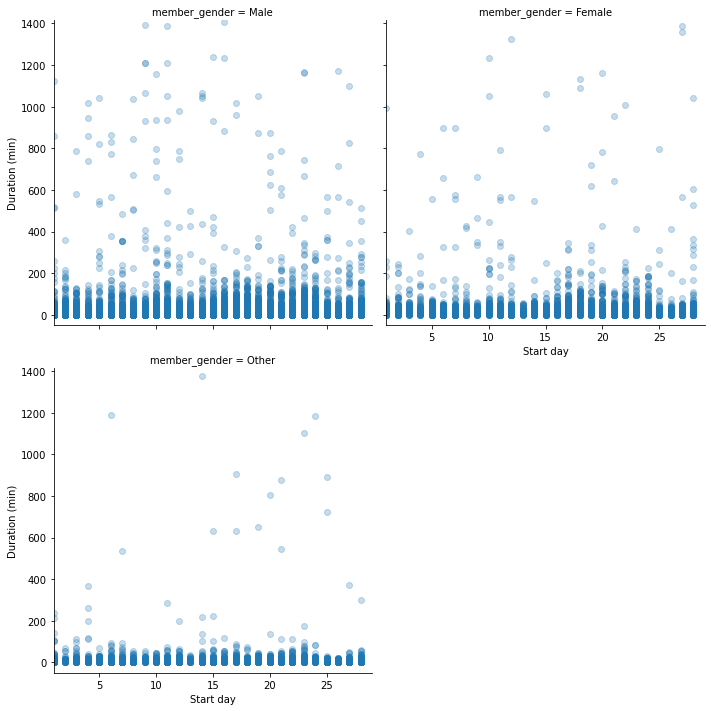

In [50]:
genders = sb.FacetGrid(data = ford, col = 'member_gender', col_wrap = 2, height = 5,
                 xlim = [1, 29], ylim = [-50, 1415])
genders.map(plt.scatter, 'Start_day', 'Duration_min', alpha=0.25)
genders.set_xlabels('Start day')
genders.set_ylabels('Duration (min)')
plt.show()

#### Comparing the gender types related to trip Duration and Start day, for the low concentration region of the plot (>200 minutes), the females and males appear to have similar ride averages. 

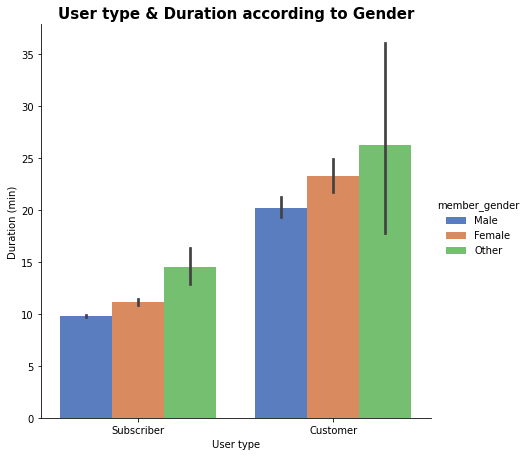

In [51]:
g = sns.catplot(x="user_type", y="Duration_min",hue= "member_gender",
                    data=ford, kind="bar",
                    height=6,palette="muted")
g.despine(left=False)
g.set_ylabels("Duration (min)")
g.set_xlabels("User type");
plt.title('User type & Duration according to Gender',fontweight="bold",fontsize = 15);

#### The above chart represents the interaction of trip duration with the user types for different member genders. We can observe that the overall customer's duration is almost twice that of subscribers for all genders. Moreover, for both type of users, the other genders have a ride duration higher than males and females.

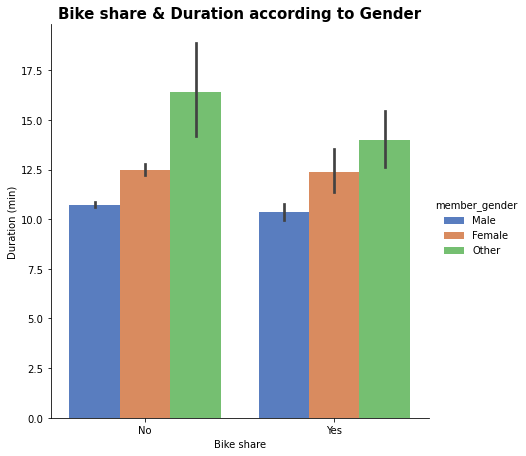

In [52]:
g = sns.catplot(x="bike_share_for_all_trip", y="Duration_min",hue= "member_gender",
                    data=ford, kind="bar",
                    height=6,palette="muted")
g.despine(left=False)
g.set_xlabels("Bike share")
g.set_ylabels("Duration (min)");
plt.title('Bike share & Duration according to Gender',fontweight="bold",fontsize = 15);

#### For Bike Share members, other genders still dominant over males and females in ride duration.

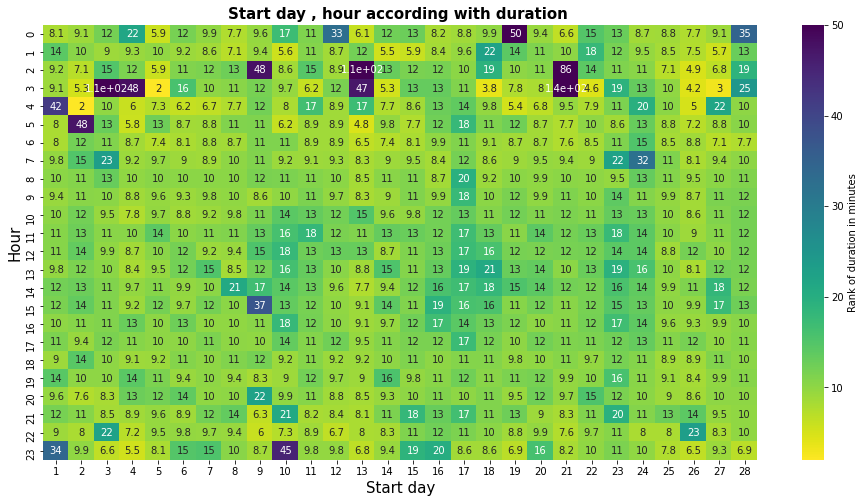

In [53]:
plt.figure(figsize = [16,8])

data = ford.pivot_table(index='Start_hour', columns='Start_day', values='Duration_min')
sns.heatmap(data,annot=True,vmax=50,cmap='viridis_r',cbar_kws={'label': 'Rank of duration in minutes'});
plt.xlabel('Start day', fontsize = 15)
plt.ylabel('Hour', fontsize = 15)
plt.title('Start day , hour according with duration ',fontweight="bold",fontsize = 15);

#### The above heatmap reinforces the above observations that the majority of the trips average durations is around 11 minutes, and it is almost uniform along the hours and the days.

# Summary of Findings:


In brief, we have studied the Ford GoBike dataset, which includes a part of information about a bike-sharing system covering the greater San Francisco Bay area for a period of one month starting from the 1st of February 2019. After performing analysis, we have the following findings:

1. Distributions of the trips along the day hour show two prominent peaks at 8 AM and 5 PM, confirming that the bike share system is busiest during rush hours. For the days of the month, we found that users ride more on workdays, whilst during the weekends, the number of trips falls down. There is an irregularity in the data of some days, which can be attributed to holidays or disturbances in the weather on such days.


2. Most of the bikes rides are taken low time durations, and very few are taken long durations. The mean value of all duration is about 11.23 minutes, which reinforces the idea that the bikes are often used for short trips. Indeed, 75% of the rides are below 13 minutes, and 50% are below 8 minutes, with the most extended trip is 1409 minutes and the shortest being one minute.


3. Males represent most users who use the go bike service with a percentage of 74.59%, and after those, females and other genders come with percentages of 23,32% and 2.08%, respectively. The most important result here is that a remarkable percentage of the other genders users spend more time on their trips than males and females for trip durations <50 minutes. For trip durations (>200 minutes), the females and males appear to have similar ride averages, whilst the other genders are barely there.


4. For all genders, about 50% of users ages range from 27 to 39 years old, with a mean age of approximately 34.19. Further, most of the most extended trips took by users in the age range from 18-30.


5. Most Ford GoBike users are subscribers (90.53 % of total users) who use the service. However, the customers representing only 9.47 % of the total users spend more time on their trips than the subscriber. Also, the subscribers appear to use the bike on weekdays, but the customer's usage concentrates more on the next half of the month.


6. For Bike Share program members, the majority of users spend less time on their trips than regular users. Further, there is no remarkable change in the distribution of the bike Share members along the month days, which may be because this program is directed to low-income residents. And so most of them may not have a fixed job.



